In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# basic plot variales
pd.options.display.max_columns = 100
blue = '#3298D0'
plot_size = (14, 10)

## Load data

In [3]:
#load data
DATA_FILE = "Data/nba-players-stats/Seasons_Stats.csv"

def load_NBA_data(url):
    return pd.read_csv(url)

nba_data = load_NBA_data(DATA_FILE)

## Data cleaning
- Drop columns don't needed
- Delete NA and inf values
- Correct dtypes values

In [4]:
#Dataset info
print(nba_data.columns)
#24,691 entries

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


In [5]:
# Dates formatting
nba_data['Year'] =  pd.to_datetime(nba_data['Year'])
nba_data['year'] = nba_data['Year'].astype('int64')

In [6]:
nba_data = nba_data.fillna(0)

In [7]:
# New data types
nba_data['Pos'] = nba_data['Pos'].astype('category')
nba_data['Pos'] = nba_data['Pos'].astype('category')

#stats to int32
list_stats_int = ['ORB', 'DRB', 'TRB', 'AST', 
                  'STL', 'BLK', 'TOV', 'PF', 
                  'PTS', '3P', '3P%', 'G', 'Age', 
                  'PTS', 'MP', '3PA']
for ls in list_stats_int:
    nba_data[ls] = nba_data[ls].astype('int32')

In [8]:
# Delete colum ns
nba_data = nba_data.drop(columns = ['Year', 'blanl', 'blank2', 'Unnamed: 0'])

In [9]:
nba_data.sample(5)

,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year
2103,Larry Costello,PG,33,PHI,64,0.0,1967,14.0,0.527,0.000,0.399,0.0,0.0,0.0,19.3,0.0,0.0,0.0,0.0,4.1,1.5,5.7,0.138,0.0,0.0,0.0,0.0,309.0,695.0,0.445,0,0,0,309.0,695.0,0.445,0.445,243.0,277.0,0.877,0,0,169,275,0,0,0,242,861,1965
9092,Ricky Wilson,PG,23,NJN,6,0.0,47,17.6,0.663,0.091,1.000,2.4,0.0,1.2,19.3,6.2,0.0,20.2,17.8,0.1,0.1,0.1,0.147,0.5,-0.6,0.0,0.0,7.0,11.0,0.636,1,1,1,6.0,10.0,0.600,0.682,6.0,11.0,0.545,1,0,1,6,6,0,4,6,21,1988
20193,Royal Ivey,SG,28,TOT,44,0.0,326,11.0,0.527,0.422,0.145,2.1,10.3,6.1,12.4,3.1,0.5,11.1,13.8,0.2,0.3,0.6,0.086,-1.1,-0.3,-1.4,0.0,35.0,83.0,0.422,14,35,0,21.0,48.0,0.438,0.506,9.0,12.0,0.750,6,28,34,27,19,2,11,39,93,2010
5047,Tom Boswell,PF,24,BOS,65,0.0,1149,12.9,0.563,0.000,0.345,10.6,14.8,12.7,8.6,1.0,0.6,18.8,17.1,1.6,1.1,2.7,0.111,-0.3,-0.5,-0.8,0.4,185.0,357.0,0.518,0,0,0,185.0,357.0,0.518,0.518,93.0,123.0,0.756,117,171,288,71,25,14,95,204,463,1978
607,Jim Slaughter,C,23,BLB,28,0.0,525,10.1,0.377,0.000,0.412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.4,0.3,-0.1,-0.010,0.0,0.0,0.0,0.0,53.0,165.0,0.321,0,0,0,53.0,165.0,0.321,0.321,41.0,68.0,0.603,0,0,148,25,0,0,0,81,147,1952


## Filter data from 1980

In [10]:
#select only data since 1980
filtered_data = nba_data[nba_data.year > 1979 ]
filtered_data.sort_values(by='year', ascending = True)

,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year
5727,Kareem Abdul-Jabbar*,C,32,LAL,82,0.0,3143,25.3,0.639,0.001,0.344,7.2,22.2,15.4,16.5,1.2,4.6,15.7,24.1,9.5,5.3,14.8,0.227,4.0,2.7,6.7,6.8,835.0,1383.0,0.604,0,1,0,835.0,1382.0,0.604,0.604,364.0,476.0,0.765,190,696,886,371,81,280,297,216,2034,1980
5970,Eric Money,SG,24,DET,55,0.0,1467,11.7,0.539,0.000,0.204,2.0,5.0,3.5,21.8,1.6,0.4,20.5,18.3,0.6,0.2,0.8,0.026,-1.6,-2.7,-4.3,-0.9,259.0,510.0,0.508,0,0,0,259.0,510.0,0.508,0.508,81.0,104.0,0.779,28,69,97,238,53,10,143,135,599,1980
5969,Eric Money,PG,24,PHI,6,0.0,82,4.4,0.407,0.000,0.056,4.1,4.9,4.5,27.2,0.0,0.7,24.5,23.8,-0.2,0.1,-0.2,-0.094,-6.8,-3.9,-10.7,-0.2,14.0,36.0,0.389,0,0,0,14.0,36.0,0.389,0.389,2.0,2.0,1.000,3,4,7,16,0,1,12,11,30,1980
5968,Eric Money,SG-PG,24,TOT,61,0.0,1549,11.4,0.531,0.000,0.194,2.1,5.0,3.5,22.1,1.5,0.4,20.7,18.6,0.4,0.3,0.6,0.020,-1.8,-2.8,-4.7,-1.0,273.0,546.0,0.500,0,0,0,273.0,546.0,0.500,0.500,83.0,106.0,0.783,31,73,104,254,53,11,155,146,629,1980
5967,Sidney Moncrief,SG,22,MIL,77,0.0,1557,15.9,0.564,0.002,0.647,11.1,12.5,11.8,10.7,2.2,0.6,16.8,17.8,2.8,2.0,4.9,0.150,0.9,0.7,1.7,1.4,211.0,451.0,0.468,0,1,0,211.0,450.0,0.469,0.468,232.0,292.0,0.795,154,184,338,133,72,16,117,106,654,1980
5966,Paul Mokeski,C,23,HOU,12,0.0,113,4.4,0.392,0.000,0.273,13.3,15.1,14.2,2.2,0.4,3.0,21.3,16.4,-0.2,0.1,-0.1,-0.041,-6.1,-1.6,-7.7,-0.2,11.0,33.0,0.333,0,0,0,11.0,33.0,0.333,0.333,7.0,9.0,0.778,14,15,29,2,1,6,10,24,29,1980
5965,Steve Mix,SF,32,PHI,81,0.0,1543,19.5,0.577,0.014,0.354,8.3,11.5,10.0,14.8,2.0,0.3,14.0,24.5,3.4,2.1,5.5,0.172,1.9,-0.8,1.1,1.2,363.0,703.0,0.516,4,10,0,359.0,693.0,0.518,0.519,207.0,249.0,0.831,114,176,290,149,67,9,132,114,937,1980
5964,Mike Mitchell,SF,24,CLE,82,0.0,2802,19.1,0.557,0.004,0.231,7.4,15.2,11.1,4.9,1.1,1.5,9.5,24.7,5.9,2.4,8.3,0.142,1.7,-1.4,0.3,1.6,775.0,1482.0,0.523,0,6,0,775.0,1476.0,0.525,0.523,270.0,343.0,0.787,206,385,591,93,70,77,172,259,1820,1980
5963,Dave Meyers,PF,26,MIL,79,0.0,2204,13.3,0.509,0.006,0.296,7.1,14.7,11.0,13.6,1.5,1.0,16.2,20.2,1.0,2.8,3.9,0.084,-0.8,0.7,-0.1,1.0,399.0,830.0,0.481,1,5,0,398.0,825.0,0.482,0.481,156.0,246.0,0.634,140,308,448,225,72,40,182,218,955,1980
5971,Earl Monroe*,SG,35,NYK,51,0.0,633,15.3,0.497,0.000,0.182,2.7,3.5,3.1,15.0,1.5,0.3,6.9,24.8,1.0,0.1,1.1,0.081,-0.8,-4.7,-5.5,-0.6,161.0,352.0,0.457,0,0,0,161.0,352.0,0.457,0.457,56.0,64.0,0.875,16,20,36,67,21,3,28,46,378,1980


# ML model

In [11]:
from sklearn.cluster import KMeans

## Preparing dataset

In [12]:
df = filtered_data.groupby(['Player']).agg({'3PA':'sum', 
                                            '3P':'sum', 
                                            'year':'count', 
                                            'PTS':'sum',
                                            'MP':'sum',
                                            'TRB':'sum',
                                            'AST':'sum',
                                            'BLK':'sum'
                                           })

In [13]:
df.sample(10)

,3PA,3P,year,PTS,MP,TRB,AST,BLK
Player,,,,,,,,
Mike Williams,2,0,3,30,204,46,4,14
Robert Parish*,6,0,18,20308,39940,12576,1896,1927
Dale Davis,8,0,18,8990,30913,8980,1025,1335
Sergio Rodriguez,691,234,7,2181,6329,614,1395,18
Kirk Penney,4,1,2,5,30,2,2,0
Len Elmore,1,0,5,1603,5747,1309,302,251
Frank Johnson,243,53,10,4937,12897,1025,2476,36
Buck Johnson,62,7,7,4617,11849,1760,856,252
Michael Jackson,33,9,3,188,888,70,198,5


In [14]:
# Create two new columns
df['3PA_per_season'] = round(df['3PA'] / df['year'], 2)
df['3P%_career'] = (round(df['3PA'] / df['3P'], 2)) * 10

#sort values by total 3P
df = df.sort_values(by='3P', ascending=False)

# Check dataset
print(df.count())
df.sample(10)

3PA               2835
3P                2835
year              2835
PTS               2835
MP                2835
TRB               2835
AST               2835
BLK               2835
3PA_per_season    2835
3P%_career        2457
dtype: int64


,3PA,3P,year,PTS,MP,TRB,AST,BLK,3PA_per_season,3P%_career
Player,,,,,,,,,,
Don MacLean,197,56,9,3490,6679,1210,404,51,21.89,35.200000
Joe Young,69,15,2,222,519,67,80,0,34.50,46.000000
Warren Kidd,0,0,1,247,884,233,19,23,0.00,NaN
Walt Frazier*,1,0,1,10,27,3,8,1,1.00,inf
Adrian Griffin,180,50,11,1984,8304,1571,680,61,16.36,36.000000
Kenny Payne,58,17,4,508,1167,170,61,22,14.50,34.100000
God Shammgod,2,0,1,61,146,7,36,1,2.00,inf
John Gianelli,0,0,1,55,285,62,17,7,0.00,NaN
Eldridge Recasner,585,239,10,1737,5154,534,527,12,58.50,24.500000


In [15]:
# Replace inf values with nan
df['3P%_career'] = df['3P%_career'].replace([np.inf, -np.inf], np.nan)

# Drop Na values
df = df.dropna()

In [16]:
print(df.count())
df.sample(20)

3PA               2007
3P                2007
year              2007
PTS               2007
MP                2007
TRB               2007
AST               2007
BLK               2007
3PA_per_season    2007
3P%_career        2007
dtype: int64


,3PA,3P,year,PTS,MP,TRB,AST,BLK,3PA_per_season,3P%_career
Player,,,,,,,,,,
Baron Davis,4752,1531,17,15092,31822,3514,6778,402,279.53,31.0
Dominic McGuire,16,3,11,1028,6042,1326,453,199,1.45,53.3
Allen Crabbe,686,282,4,1878,5142,523,237,52,171.50,24.3
Desmond Mason,326,87,12,8914,22404,3386,1212,262,27.17,37.5
Alton Lister,9,1,18,6441,19700,6276,933,1515,0.50,90.0
Harrison Barnes,986,365,5,4605,11425,1819,564,78,197.20,27.0
Kiwane Garris,15,5,2,72,248,20,30,1,7.50,30.0
Jonny Flynn,383,128,5,1635,4154,346,730,9,76.60,29.9
Maurice Carter,22,8,3,84,220,22,8,0,7.33,27.5


## Add info from another dataset

In [17]:
# Load personal data
path_to_players_profiles = ('data/nba-players-stats/player_data.csv')
player_profiles = load_NBA_data(path_to_players_profiles)

player_profiles = player_profiles.rename(index=str, columns={'name':'Player'})

In [18]:
player_profiles.head()

,Player,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [44]:
# Join tables
full_df = pd.merge(df, player_profiles, on='Player', how='inner')

full_df.head()
print(df.count())

3PA               2007
3P                2007
year              2007
PTS               2007
MP                2007
TRB               2007
AST               2007
BLK               2007
3PA_per_season    2007
3P%_career        2007
dtype: int64


In [20]:
# convert position to numeric value
full_df['position'].unique()
full_df['position'] = full_df['position'].astype('category')
# Label encoding
full_df["position_encoding"] = full_df["position"].cat.codes

In [21]:
# Convert height to numeric value
full_df['height'] = full_df['height'].str.replace('-','.')

In [22]:
# Convert height to float
full_df["height"] = full_df["height"].astype('float32')

In [23]:
full_df.isnull().any()

Player               False
3PA                  False
3P                   False
year                 False
PTS                  False
MP                   False
TRB                  False
AST                  False
BLK                  False
3PA_per_season       False
3P%_career           False
year_start           False
year_end             False
position             False
height               False
weight               False
birth_date           False
college               True
position_encoding    False
dtype: bool

In [24]:
full_df['college'] = full_df['college'].replace(np.NaN, 'None')

In [25]:
print(full_df[full_df.college.isnull()])
full_df.isnull().any()

Empty DataFrame
Columns: [Player, 3PA, 3P, year, PTS, MP, TRB, AST, BLK, 3PA_per_season, 3P%_career, year_start, year_end, position, height, weight, birth_date, college, position_encoding]
Index: []


Player               False
3PA                  False
3P                   False
year                 False
PTS                  False
MP                   False
TRB                  False
AST                  False
BLK                  False
3PA_per_season       False
3P%_career           False
year_start           False
year_end             False
position             False
height               False
weight               False
birth_date           False
college              False
position_encoding    False
dtype: bool

In [35]:
# Check for duplicates values
len(pd.concat(g for _, g in full_df.groupby("Player") if len(g) > 1))

61

In [36]:
# Drop duplicate rows
pd.concat(g for _, g in full_df.groupby('Player') if len(g) > 1)

,Player,3PA,3P,year,PTS,MP,TRB,AST,BLK,3PA_per_season,3P%_career,year_start,year_end,position,height,weight,birth_date,college,position_encoding
964,Bobby Jones,131,37,14,6086,14412,2652,1243,605,9.36,35.4,1975,1986,F,6.90,210.0,"December 18, 1951",University of North Carolina,2
965,Bobby Jones,131,37,14,6086,14412,2652,1243,605,9.36,35.4,2007,2008,F,6.70,215.0,"January 9, 1984",University of Washington,2
1434,Cedric Henderson,43,6,8,1907,6214,771,419,111,5.38,71.7,1987,1987,F,6.80,210.0,"October 3, 1965",University of Georgia,2
1435,Cedric Henderson,43,6,8,1907,6214,771,419,111,5.38,71.7,1998,2002,F,6.70,215.0,"March 11, 1975",University of Memphis,2
835,Charles Jones,194,59,23,3311,18909,4299,990,1331,8.43,32.9,1984,1998,F-C,6.90,215.0,"April 3, 1957",Albany State University,3
836,Charles Jones,194,59,23,3311,18909,4299,990,1331,8.43,32.9,1985,1989,F,6.80,215.0,"January 12, 1962",University of Louisville,2
837,Charles Jones,194,59,23,3311,18909,4299,990,1331,8.43,32.9,1999,2000,G,6.30,180.0,"July 17, 1975",Long Island University,5
648,Charles Smith,453,122,23,9830,21157,3927,1132,954,19.70,37.1,1989,1997,F-C,6.10,230.0,"July 16, 1965",University of Pittsburgh,3
649,Charles Smith,453,122,23,9830,21157,3927,1132,954,19.70,37.1,1990,1996,G,6.10,160.0,"November 29, 1967",Georgetown University,5
650,Charles Smith,453,122,23,9830,21157,3927,1132,954,19.70,37.1,1998,2006,G,6.40,194.0,"August 22, 1975",University of New Mexico,5


In [45]:
# Check manually wrong values by birth_date
# Check Ray Allen 3P values

# Kmeans classification

In [37]:
# Create clusters
n = 6
clusters = KMeans(n_clusters=n)

X = full_df[['3PA','3P','3PA_per_season','3P%_career', 'year', 'height', 'position_encoding']]

# Fit clusterer
clusters.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [38]:
# Create new group with values
full_df['group'] = clusters.predict(X)

In [39]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1972 entries, 0 to 1971
Data columns (total 20 columns):
Player               1972 non-null object
3PA                  1972 non-null int32
3P                   1972 non-null int32
year                 1972 non-null int64
PTS                  1972 non-null int32
MP                   1972 non-null int32
TRB                  1972 non-null int32
AST                  1972 non-null int32
BLK                  1972 non-null int32
3PA_per_season       1972 non-null float64
3P%_career           1972 non-null float64
year_start           1972 non-null int64
year_end             1972 non-null int64
position             1972 non-null category
height               1972 non-null float32
weight               1972 non-null float64
birth_date           1972 non-null object
college              1972 non-null object
position_encoding    1972 non-null int8
group                1972 non-null int32
dtypes: category(1), float32(1), float64(3), int32(8), int64

In [40]:
full_df.group = full_df.group.astype('category', ordered = False, categories = range(0, n))

/Users/cmserna/miniconda3/envs/nba/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


In [41]:
full_df.group.unique()

[2, 4, 1, 5, 3, 0]
Categories (6, int64): [2, 4, 1, 5, 3, 0]

In [42]:
group_0 = full_df[(full_df['group'] == 0)]
group_1 = full_df[(full_df['group'] == 1)]
group_2 = full_df[(full_df['group'] == 2)]
group_3 = full_df[(full_df['group'] == 3)]
group_4 = full_df[(full_df['group'] == 4)]
group_5 = full_df[(full_df['group'] == 5)]

In [43]:
h = 25

print('\n------------')
print('Group 0: {} players'.format(group_0.describe()))
print(group_0.sort_values(by='3P', ascending=False).head(h))

print('\n------------')
print('Group 1: {} players'.format(group_1.describe()))
print(group_1.sort_values(by='3P', ascending=False).head(h))

print('\n------------')
print('Group 2: {} players'.format(group_2.describe()))
print(group_2.sort_values(by='3P', ascending=False).head(h))

print('\n------------')
print('Group 3: {} players'.format(group_3.describe()))
print(group_3.sort_values(by='3P', ascending=False).head(h))

print('\n------------')
print('Group 4: {} players'.format(group_4.describe()))
print(group_4.sort_values(by='3P', ascending=False).head(h))

print('\n------------')
print('Group 5: {} players'.format(group_5.describe()))
print(group_5.sort_values(by='3P', ascending=False).head(h))


------------
Group 0:                3PA           3P         year           PTS            MP  \
count  1275.000000  1275.000000  1275.000000   1275.000000   1275.000000   
mean     75.433725    20.939608     5.943529   2201.291765   5697.032157   
std      82.239929    26.044738     4.953943   3319.913575   7759.941054   
min       1.000000     1.000000     1.000000      3.000000      3.000000   
25%      14.000000     2.000000     2.000000    183.000000    558.500000   
50%      38.000000     8.000000     4.000000    711.000000   2124.000000   
75%     113.500000    30.500000     9.000000   3035.500000   8059.500000   
max     339.000000   120.000000    27.000000  26496.000000  47368.000000   

                TRB          AST          BLK  3PA_per_season  3P%_career  \
count   1275.000000  1275.000000  1275.000000     1275.000000  1275.00000   
mean    1195.898824   426.883922   155.177255       19.785051    50.86102   
std     1973.755334   679.852607   329.236043       29.070841

Group 4:                3PA           3P       year           PTS            MP  \
count    74.000000    74.000000  74.000000     74.000000     74.000000   
mean   3450.932432  1266.202703  15.959459  12957.297297  28520.054054   
std     361.850697   152.582067   3.765158   4397.231083   7020.820560   
min    2892.000000  1035.000000   6.000000   7154.000000  14708.000000   
25%    3201.500000  1163.000000  13.250000   9143.250000  23254.750000   
50%    3363.000000  1247.000000  16.000000  12137.500000  27975.500000   
75%    3698.750000  1346.000000  18.000000  15552.500000  33100.000000   
max    4295.000000  1699.000000  27.000000  28787.000000  44250.000000   

               TRB           AST          BLK  3PA_per_season  3P%_career  \
count    74.000000     74.000000    74.000000       74.000000   74.000000   
mean   3657.905405   3263.648649   314.351351      228.834459   27.352703   
std    1640.298579   1842.382105   286.286208       65.622048    1.843182   
min    1423.0000

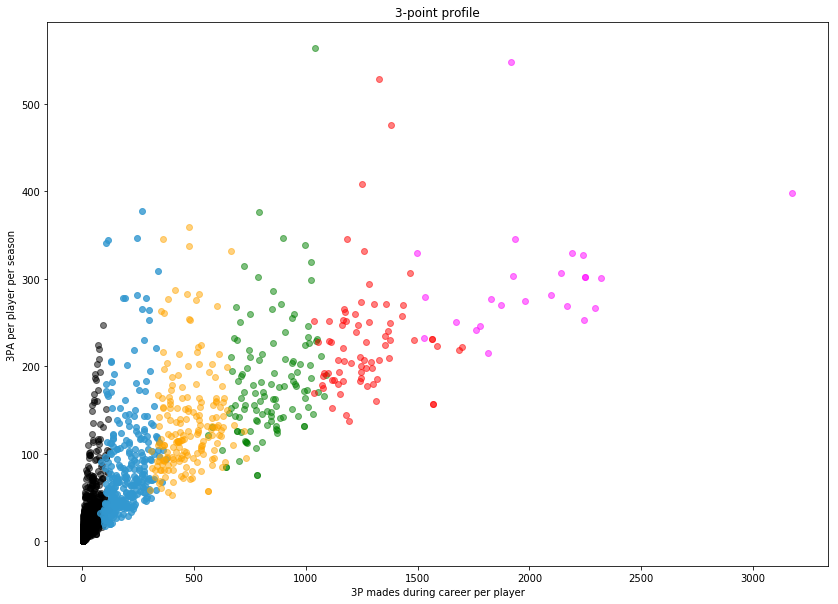

In [46]:
'''
Variables in the model:
3PA', '3P', 'year', '3PA_per_season', '3P%_career'
'''

plt.figure(figsize=plot_size)

a = '3P'
b = '3PA_per_season'
h = 0.5
h_top = 0.8

plt.scatter(group_0[a], group_0[b], c='black', alpha=h)
plt.scatter(group_1[a], group_1[b], c='green', alpha=h)
plt.scatter(group_2[a], group_2[b], c='magenta', alpha=h)
plt.scatter(group_3[a], group_3[b], c= blue, alpha=h_top)
plt.scatter(group_4[a], group_4[b], c='red', alpha=h)
plt.scatter(group_5[a], group_5[b], c='orange', alpha=h)

plt.title('3-point profile')
plt.xlabel('3P mades during career per player')
plt.ylabel('3PA per player per season')

plt.xscale('linear')
plt.yscale('linear')

plt.show()

In [26]:
# Exporting dataset 
df.to_csv(path_or_buf='data/RM-index.csv', sep=',')